In [237]:
# Importing all necessary libraries  

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, chi2_contingency, f_oneway

In [238]:
# Importing csv file
df = pd.read_csv('yulu.csv')

In [239]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [240]:
# Perfoming basic EDA

# 1. Shape of dataset
df.shape

(10886, 12)

In [241]:
# 2. Getting column info on datatypes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [242]:
# Finding missing/null values in the dataset

df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [243]:
# Columns containing object/categorical datatype

cat_cols = df.dtypes == 'object'
cat_cols = list(cat_cols[cat_cols].index)
cat_cols

['datetime']

In [244]:
df.weather.value_counts()

weather
1    7192
2    2834
3     859
4       1
Name: count, dtype: int64

In [245]:
# Converting categorical variables into object datatype
cat = ['season', 'holiday', 'workingday', 'weather']

for i in cat:
    df[i] = df[i].astype('object')

In [246]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  object 
 2   holiday     10886 non-null  object 
 3   workingday  10886 non-null  object 
 4   weather     10886 non-null  object 
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 1020.7+ KB


In [247]:
# Getting statistical information on columns with numerical datatypes

df.describe()

,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [248]:
# Replacing rownames with specific names in categorical columns

df = df.replace({'season' : {1:'spring',2:'summer',3:'fall',4:'winter'}})
df = df.replace({'holiday':{ 0:'Not a holiday', 1: 'Holiday'}})
df = df.replace({'workingday':{1:'Working day', 0:'weekend/holiday'}})
df = df.replace({'weather': {1:'Clear/Partly cloudy', 2: 'Mist/Cloudy', 3: 'LightRains/ LightSnow', 4: 'HeavyRains/Thunderstorm/Snow'}})

In [249]:
# Performing Univariate Analysis using value_counts
df.season.value_counts()

season
winter    2734
summer    2733
fall      2733
spring    2686
Name: count, dtype: int64

In [250]:
df.holiday.value_counts()

holiday
Not a holiday    10575
Holiday            311
Name: count, dtype: int64

In [251]:
df.workingday.value_counts()

workingday
Working day        7412
weekend/holiday    3474
Name: count, dtype: int64

In [252]:
df.weather.value_counts()

weather
Clear/Partly cloudy             7192
Mist/Cloudy                     2834
LightRains/ LightSnow            859
HeavyRains/Thunderstorm/Snow       1
Name: count, dtype: int64

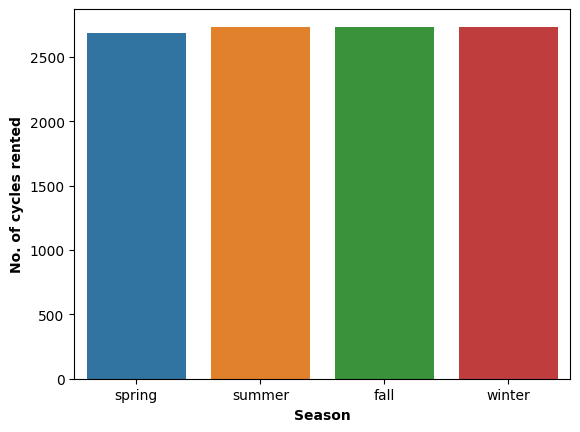

In [253]:
# Data visualization of Univariate Analysis using countplot

sns.countplot(data = df, x = 'season')
plt.xlabel('Season', fontweight = 'bold')
plt.ylabel('No. of cycles rented', fontweight = 'bold')
plt.show()

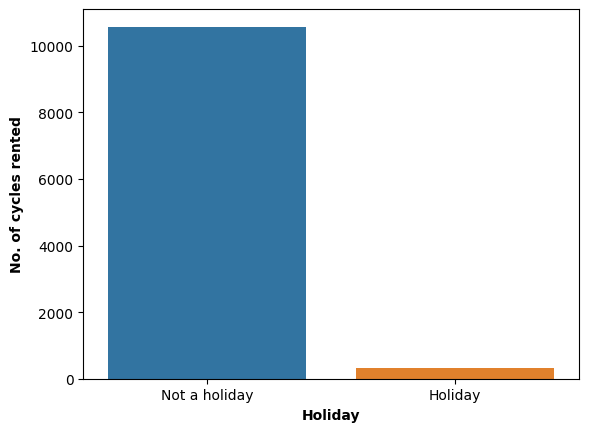

In [254]:
sns.countplot(data = df, x = 'holiday')
plt.xlabel('Holiday', fontweight = 'bold')
plt.ylabel('No. of cycles rented', fontweight = 'bold')
plt.show()

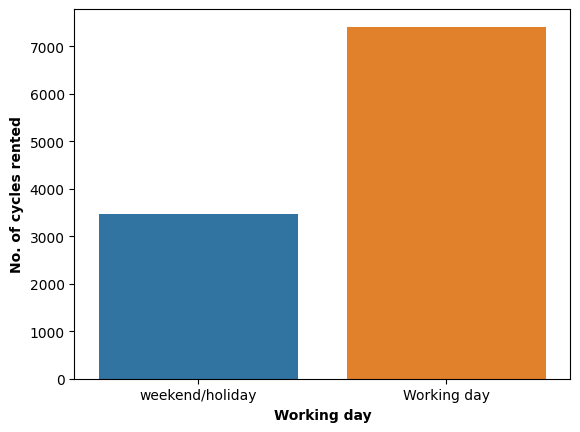

In [255]:
sns.countplot(data = df, x = 'workingday')
plt.xlabel('Working day', fontweight = 'bold')
plt.ylabel('No. of cycles rented', fontweight = 'bold')
plt.show()

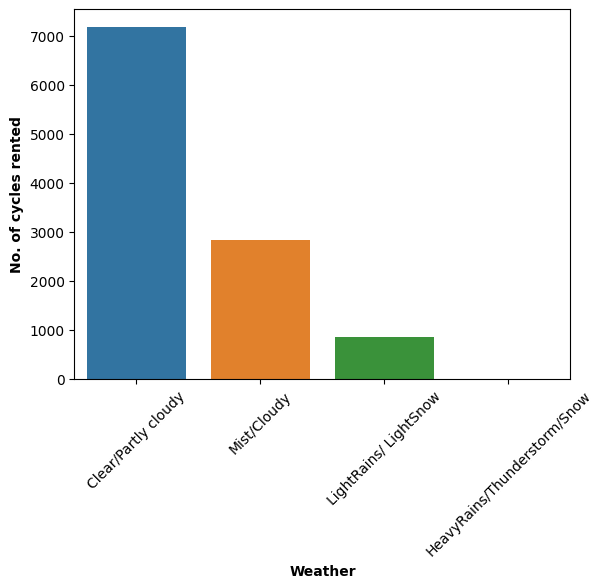

In [256]:
sns.countplot(data = df, x = 'weather')
plt.xlabel('Weather', fontweight = 'bold')
plt.xticks(rotation = 45)
plt.ylabel('No. of cycles rented', fontweight = 'bold')
plt.show()

In [257]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,spring,Not a holiday,weekend/holiday,Clear/Partly cloudy,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,spring,Not a holiday,weekend/holiday,Clear/Partly cloudy,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,spring,Not a holiday,weekend/holiday,Clear/Partly cloudy,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,spring,Not a holiday,weekend/holiday,Clear/Partly cloudy,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,spring,Not a holiday,weekend/holiday,Clear/Partly cloudy,9.84,14.395,75,0.0,0,1,1


C:\Users\Admin\AppData\Local\Temp\ipykernel_9404\4092587484.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['temp'], bins = 20)


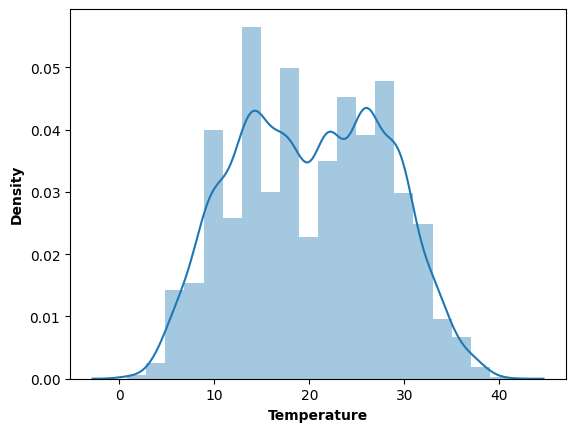

In [258]:
sns.distplot(df['temp'], bins = 20)
plt.xlabel('Temperature', fontweight = 'bold')
plt.ylabel('Density', fontweight = 'bold')
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_9404\3717075047.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['atemp'], bins = 10)


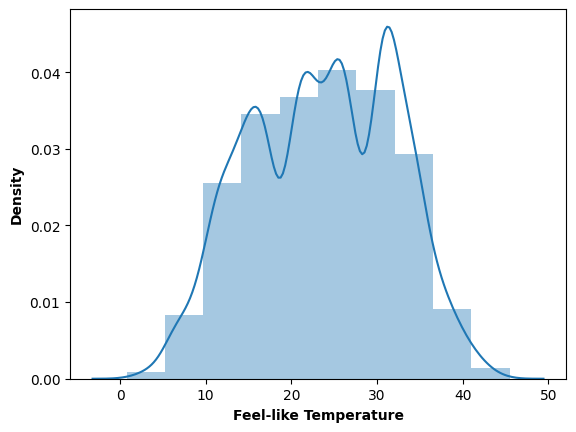

In [259]:
sns.distplot(df['atemp'], bins = 10)
plt.xlabel('Feel-like Temperature', fontweight = 'bold')
plt.ylabel('Density', fontweight = 'bold')
plt.show()

In [260]:
df.workingday.value_counts()

workingday
Working day        7412
weekend/holiday    3474
Name: count, dtype: int64

In [261]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,spring,Not a holiday,weekend/holiday,Clear/Partly cloudy,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,spring,Not a holiday,weekend/holiday,Clear/Partly cloudy,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,spring,Not a holiday,weekend/holiday,Clear/Partly cloudy,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,spring,Not a holiday,weekend/holiday,Clear/Partly cloudy,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,spring,Not a holiday,weekend/holiday,Clear/Partly cloudy,9.84,14.395,75,0.0,0,1,1


In [262]:
# Hypothesis Testing
# 1. Effect of working day on the bicycles being rented

# H0: Working day and bicyles rented are independent
# Ha: Number of bicyles rented are dependent on the working day
# significance (alpha) == 0.05

working = df[df['workingday'] == 'Working day']['count']
not_working = df[df['workingday'] == 'weekend/holiday']['count']
t_stat, p_value = ttest_ind(working, not_working, alternative = 'greater')

In [263]:
p_value                      #p_value > alpha, we fail to reject null hypothesis.

0.11322402113180674

In [264]:
df.weather.value_counts()

weather
Clear/Partly cloudy             7192
Mist/Cloudy                     2834
LightRains/ LightSnow            859
HeavyRains/Thunderstorm/Snow       1
Name: count, dtype: int64

In [265]:
# 2. Weather

# H0: Number of cycles being rented are independent of weather 
# Ha: Number of cycles being depends on weather conditions
# sigificance (alpha) = 0.05

weather_1 = df[df['weather'] == 'Clear/Partly cloudy']['count']
weather_2 = df[df['weather'] == 'Mist/Cloudy']['count']
weather_3 = df[df['weather'] == 'LightRains/ LightSnow']['count']
weather_4 = df[df['weather'] == 'HeavyRains/Thunderstorm/Snow']['count']

f_stats, p_value = f_oneway(weather_1, weather_2, weather_3, weather_4)

In [266]:
p_value

5.482069475935669e-42

In [267]:
df.season.value_counts()

season
winter    2734
summer    2733
fall      2733
spring    2686
Name: count, dtype: int64

In [268]:
# 3. Seasons

# H0: Number of cycles being rented are independent of season
# Ha: Number of cycles being depends on season
# sigificance (alpha) = 0.05

winter = df[df['season'] == 'winter']['count']
summer = df[df['season'] == 'summer']['count']
fall = df[df['season'] == 'fall']['count']
spring = df[df['season'] == 'spring']['count']

f_stats, p_value = f_oneway(winter, summer, fall, spring)

In [230]:
p_value

1.5499250736864862e-07

In [236]:
# 4. relationship between weather and season

# H0: Weather and seasons are independent
# Ha: Weather and seasons are dependent
# sigificance (alpha) = 0.05

vals = pd.crosstab(df['weather'], df['season'])

chi_stat, p_value, df, expected_values = chi2_contingency(vals)

TypeError: 'int' object is not subscriptable

In [228]:
p_value

1.5499250736864862e-07

In [270]:
df.weather.value_counts()

weather
Clear/Partly cloudy             7192
Mist/Cloudy                     2834
LightRains/ LightSnow            859
HeavyRains/Thunderstorm/Snow       1
Name: count, dtype: int64

In [271]:
df.season.value_counts()

season
winter    2734
summer    2733
fall      2733
spring    2686
Name: count, dtype: int64

[]

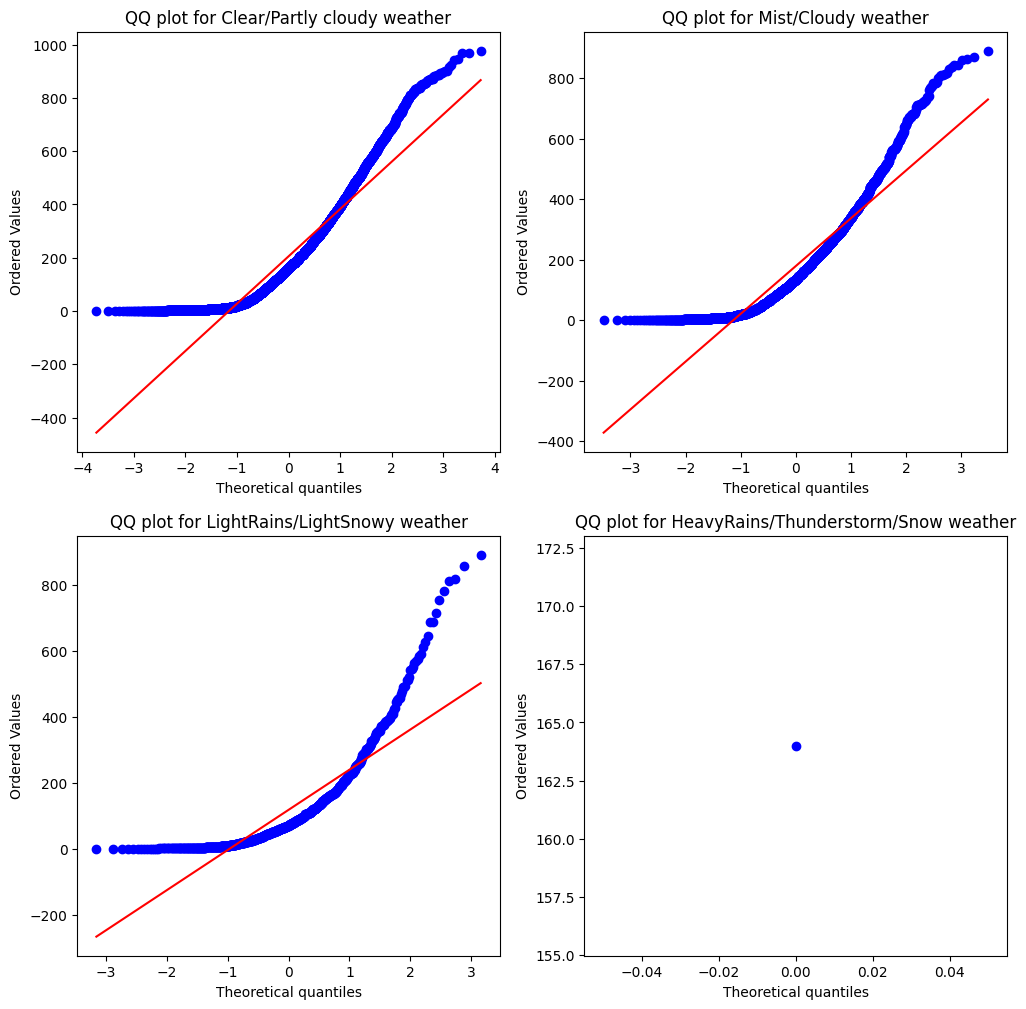

In [387]:
# Test for Normality - QQ Plot
# Weather

import scipy.stats as spy
import matplotlib.pyplot as plt

plt.figure(figsize = (12, 12))

plt.subplot(2, 2, 1)
spy.probplot(df.loc[df['weather'] == 'Clear/Partly cloudy', 'count'], plot = plt, dist = 'norm')
plt.title('QQ plot for Clear/Partly cloudy weather')

plt.subplot(2, 2, 2)
spy.probplot(df.loc[df['weather'] == 'Mist/Cloudy', 'count'], plot = plt, dist = 'norm')
plt.title('QQ plot for Mist/Cloudy weather')

plt.subplot(2, 2, 3)
spy.probplot(df.loc[df['weather'] == 'LightRains/ LightSnow', 'count'], plot = plt, dist = 'norm')
plt.title('QQ plot for LightRains/LightSnowy weather')

plt.subplot(2, 2, 4)
spy.probplot(df.loc[df['weather'] == 'HeavyRains/Thunderstorm/Snow', 'count'], plot = plt, dist = 'norm')
plt.title('QQ plot for HeavyRains/Thunderstorm/Snow weather')
plt.plot()

In [377]:
# Testing Normality using Shapiro-Wilk test
from scipy.stats import shapiro

test_stat, p_value = shapiro(df.loc[df['weather'] == 'Clear/Partly cloudy', 'count'].sample(200))
print('p-value for Clear/Partly cloudy: ', p_value,'\n')

test_stat, p_value = shapiro(df.loc[df['weather'] == 'Mist/Cloudy', 'count'].sample(200))
print('p-value for Mist/Cloudy: ',p_value,'\n')

test_stat, p_value = shapiro(df.loc[df['weather'] == 'LightRains/ LightSnow', 'count'].sample(200))
print('p-value for LightRains/LightSnow: ', p_value)


p-value for Clear/Partly cloudy:  1.5683258511312026e-11 

p-value for Mist/Cloudy:  1.3458951730882518e-09 

p-value for LightRains/LightSnow:  6.9574667953416734e-15


In [384]:
# Transforming the data using boxcox transformation and checking if the transformed data follows normal distribution

import scipy.stats as spy

transformed_weather1 = spy.boxcox(df.loc[df['weather'] == 'Clear/Partly cloudy', 'count'].sample(200))[0]
test_stat, p_value = shapiro(transformed_weather1)
print('p-value after transformation for Clear/Partly cloudy: ', p_value,'\n')

transformed_weather2 = spy.boxcox(df.loc[df['weather'] == 'Mist/Cloudy', 'count'].sample(200))[0]
test_stat, p_value = shapiro(transformed_weather2)
print('p-value after transformation for Mist/Cloudy: ', p_value,'\n')

transformed_weather3 = spy.boxcox(df.loc[df['weather'] == 'LightRains/ LightSnow', 'count'].sample(200))[0]
test_stat, p_value = shapiro(transformed_weather3)
print('p-value after transformation for LightRains/ LightSnow: ', p_value)


p-value after transformation for Clear/Partly cloudy:  0.0508435033261776 

p-value after transformation for Mist/Cloudy:  0.013127652928233147 

p-value after transformation for LightRains/ LightSnow:  0.01277914922684431


In [385]:
df.season.value_counts()

season
winter    2734
summer    2733
fall      2733
spring    2686
Name: count, dtype: int64

[]

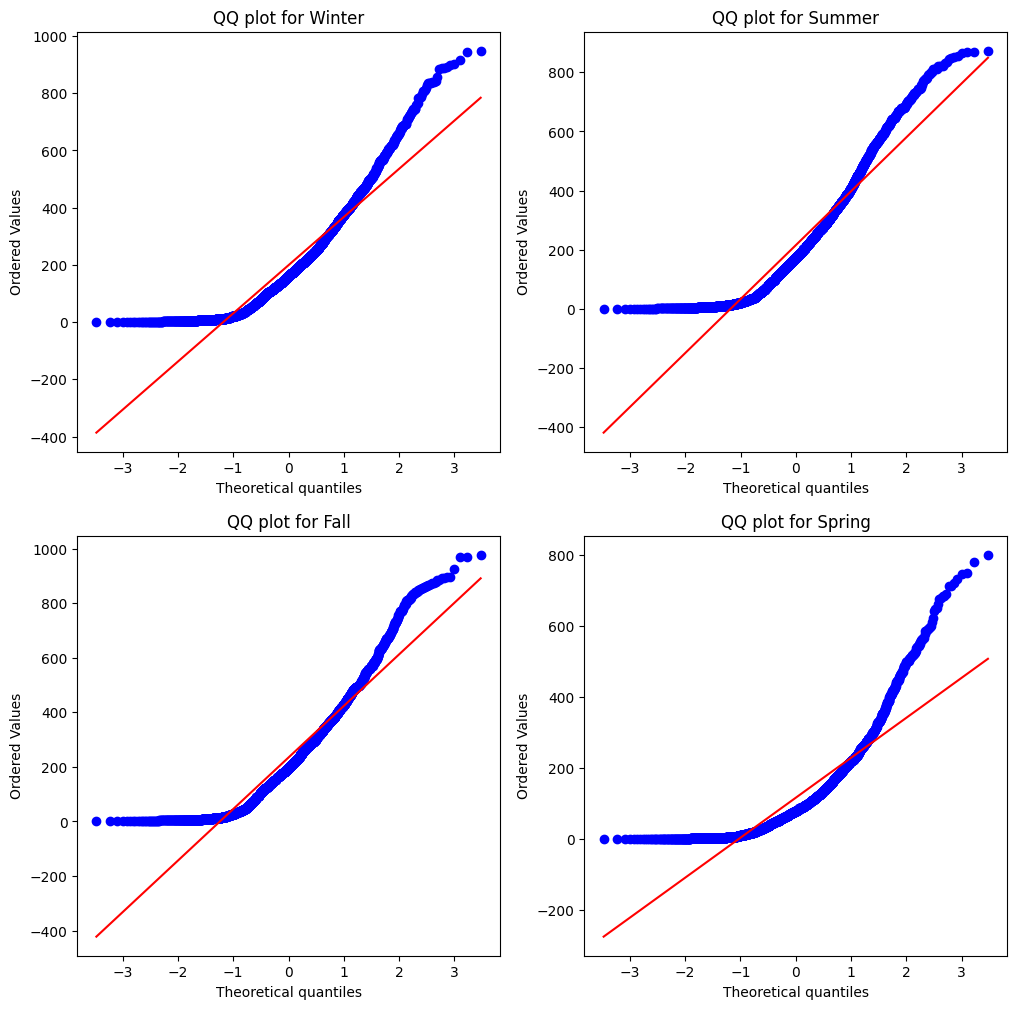

In [388]:
# Season

plt.figure(figsize = (12, 12))

plt.subplot(2, 2, 1)
spy.probplot(df.loc[df['season'] == 'winter', 'count'], plot = plt, dist = 'norm')
plt.title('QQ plot for Winter')

plt.subplot(2, 2, 2)
spy.probplot(df.loc[df['season'] == 'summer', 'count'], plot = plt, dist = 'norm')
plt.title('QQ plot for Summer')

plt.subplot(2, 2, 3)
spy.probplot(df.loc[df['season'] == 'fall', 'count'], plot = plt, dist = 'norm')
plt.title('QQ plot for Fall')

plt.subplot(2, 2, 4)
spy.probplot(df.loc[df['season'] == 'spring', 'count'], plot = plt, dist = 'norm')
plt.title('QQ plot for Spring')
plt.plot()

In [390]:
# Testing Normality using Shapiro-Wilk test
from scipy.stats import shapiro

test_stat, p_value = shapiro(df.loc[df['season'] == 'winter', 'count'].sample(200))
print('p-value for Winter: ', p_value,'\n')

test_stat, p_value = shapiro(df.loc[df['season'] == 'summer', 'count'].sample(200))
print('p-value for Summer: ',p_value,'\n')

test_stat, p_value = shapiro(df.loc[df['season'] == 'fall', 'count'].sample(200))
print('p-value for Fall: ', p_value, '\n')

test_stat, p_value = shapiro(df.loc[df['season'] == 'spring', 'count'].sample(200))
print('p-value for Spring: ', p_value)

p-value for Winter:  2.3797198878128256e-08 

p-value for Summer:  3.957505989582444e-10 

p-value for Fall:  2.1343740108648035e-09 

p-value for Spring:  5.803301395478858e-15


In [392]:
# Transforming the data using boxcox transformation and checking if the transformed data follows normal distribution

import scipy.stats as spy

transformed_winter = spy.boxcox(df.loc[df['season'] == 'winter', 'count'].sample(200))[0]
test_stat, p_value = shapiro(transformed_winter)
print('p-value after transformation for Winter: ', p_value,'\n')

transformed_summer = spy.boxcox(df.loc[df['season'] == 'summer', 'count'].sample(200))[0]
test_stat, p_value = shapiro(transformed_summer)
print('p-value after transformation for Summer: ', p_value,'\n')

transformed_fall = spy.boxcox(df.loc[df['season'] == 'fall', 'count'].sample(200))[0]
test_stat, p_value = shapiro(transformed_fall)
print('p-value after transformation for Fall: ', p_value, '\n')

transformed_spring = spy.boxcox(df.loc[df['season'] == 'spring', 'count'].sample(200))[0]
test_stat, p_value = shapiro(transformed_spring)
print('p-value after transformation for Spring: ', p_value)


p-value after transformation for Winter:  0.0016579122748225927 

p-value after transformation for Summer:  0.00030584208434447646 

p-value after transformation for Fall:  0.0014314993750303984 

p-value after transformation for Spring:  0.01451499667018652


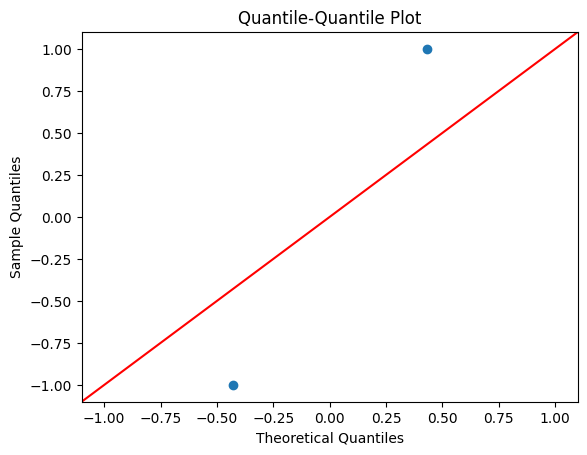

In [299]:
# Working day

from statsmodels.graphics.gofplots import qqplot
import statsmodels.api as sm

qqplot(df['workingday'].value_counts(),fit=True,line="45")
plt.title("Quantile-Quantile Plot")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.show()

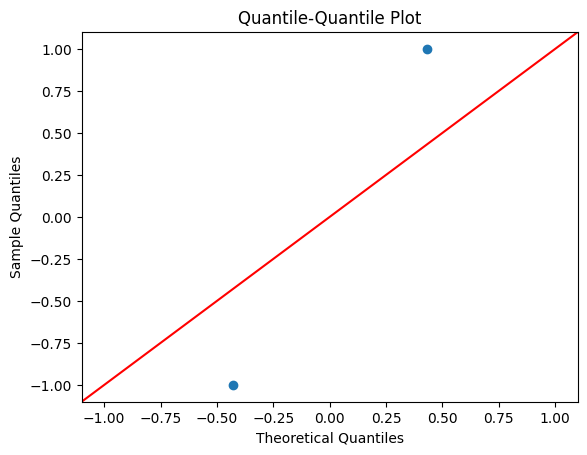

In [302]:
# Holiday

from statsmodels.graphics.gofplots import qqplot
import statsmodels.api as sm

qqplot(df['holiday'].value_counts(),fit=True,line="45")
plt.title("Quantile-Quantile Plot")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.show()

In [277]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,spring,Not a holiday,weekend/holiday,Clear/Partly cloudy,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,spring,Not a holiday,weekend/holiday,Clear/Partly cloudy,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,spring,Not a holiday,weekend/holiday,Clear/Partly cloudy,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,spring,Not a holiday,weekend/holiday,Clear/Partly cloudy,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,spring,Not a holiday,weekend/holiday,Clear/Partly cloudy,9.84,14.395,75,0.0,0,1,1


In [303]:
df.season.value_counts()

season
winter    2734
summer    2733
fall      2733
spring    2686
Name: count, dtype: int64

In [307]:
# Checking for equal variance

#Season

# H0 : all seasons are having equal variances
# Ha: they are not having equal variances

from scipy.stats import levene
statistic, p_value = levene(
 df[df['season'] == 'winter']['count'],
 df[df['season'] == 'summer']['count'],
 df[df['season'] == 'fall']['count'],
 df[df['season'] == 'spring']['count']
 )

In [308]:
p_value

1.0147116860043298e-118

In [335]:
df.weather.value_counts()

weather
Clear/Partly cloudy             7192
Mist/Cloudy                     2834
LightRains/ LightSnow            859
HeavyRains/Thunderstorm/Snow       1
Name: count, dtype: int64

In [336]:
# Weather

# H0 : all weather are having equal variances
# Ha: they are not having equal variances

from scipy.stats import levene
statistic, p_value = levene(
 df[df['weather'] == 'Clear/Partly cloudy']['count'],
 df[df['weather'] == 'Mist/Cloudy']['count'],
 df[df['weather'] == 'LightRains/ LightSnow']['count'],
 df[df['weather'] == 'HeavyRains/Thunderstorm/Snow']['count']
 )

In [338]:
p_value

3.504937946833238e-35

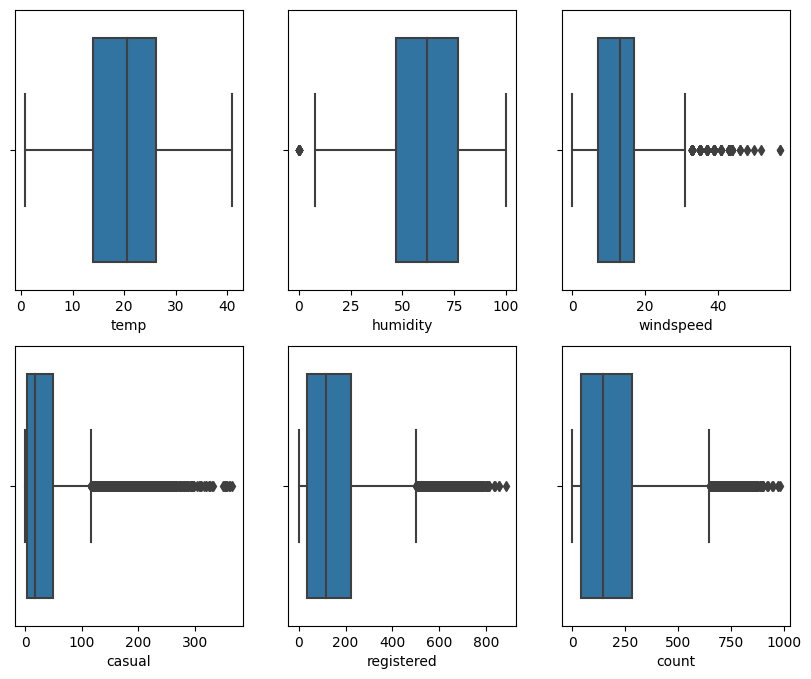

In [334]:
# Outlier detection


fig = plt.figure(figsize = (10,8))

plt.subplot(2,3,1)
sns.boxplot(data = df, x = 'temp')

plt.subplot(2,3,2)
sns.boxplot(data = df, x = 'humidity')

plt.subplot(2,3,3)
sns.boxplot(data = df, x = 'windspeed')

plt.subplot(2,3,4)
sns.boxplot(data = df, x = 'casual')

plt.subplot(2,3,5)
sns.boxplot(data = df, x = 'registered')

plt.subplot(2,3,6)
sns.boxplot(data = df, x = 'count')


plt.show()

In [395]:
# Kruskal Walis test for Weather

from scipy.stats import kruskal

df.weather1 = df.loc[df['weather'] == 'Clear/Partly cloudy', 'count']
df.weather2 = df.loc[df['weather'] == 'Mist/Cloudy', 'count']
df.weather3 = df.loc[df['weather'] == 'LightRains/ LightSnow', 'count']

test_stat, p_value = kruskal(df.weather1, df.weather2, df.weather3)
print('p-value: ', p_value)

p-value:  3.122066178659941e-45


In [396]:
# Kruskal Walis test for season

from scipy.stats import kruskal

df.winter = df.loc[df['season'] == 'winter', 'count']
df.summer = df.loc[df['season'] == 'summer', 'count']
df.fall = df.loc[df['season'] == 'fall', 'count']
df.spring = df.loc[df['season'] == 'spring', 'count']

test_stat, p_value = kruskal(df.winter, df.summer, df.fall, df.spring)
print('p-value: ', p_value)

p-value:  2.4790083726176776e-151


C:\Users\Admin\AppData\Local\Temp\ipykernel_9404\768865028.py:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.winter = df.loc[df['season'] == 'winter', 'count']
C:\Users\Admin\AppData\Local\Temp\ipykernel_9404\768865028.py:6: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.summer = df.loc[df['season'] == 'summer', 'count']
C:\Users\Admin\AppData\Local\Temp\ipykernel_9404\768865028.py:7: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.fall = df.loc[df['season'] == 'fall', 'count']
C:\Users\Admin\AppData\Local\Temp\ipykernel_9404\768865028.py:8: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see 